# 5 Model Comparison to predict house price in Bandung City 2023

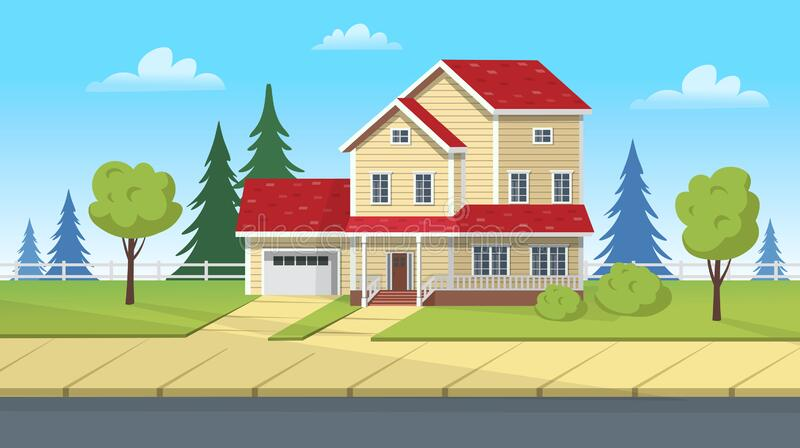

The following is a dataset of house prices in Bandung taken from the rumah123.com website. The dataset consists of several variables, namely the "Number of Bedrooms" variable.
Here we will predict house prices in Bandung with 5 different methods, and we will compare them.
In this notebook we are going to predict the price of the houses which depends on many factors.

# Read the Data

In [155]:
# Data load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [156]:
df = pd.read_csv(r"C:\Users\hp\Documents\project for portofolio\house price.csv")

In [157]:
df.head(20)

,Kamar_Tidur,Kamar_Mandi,Garasi,Luas_Tanah,Luas_Bangunan,Harga
0,3,3,1,88,51,1040000000
1,3,2,1,70,58,1090000000
2,4,3,1,240,158,1800000000
3,3,2,1,165,100,2750000000
4,4,4,2,300,200,5250000000
5,3,2,1,165,99,2650000000
6,3,2,0,104,80,1800000000
7,2,1,1,78,45,330000000
8,2,1,1,60,36,160000000
9,3,3,0,203,175,2850000000


# Exploratory Data Analysis

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Kamar_Tidur    101 non-null    int64
 1   Kamar_Mandi    101 non-null    int64
 2   Garasi         101 non-null    int64
 3   Luas_Tanah     101 non-null    int64
 4   Luas_Bangunan  101 non-null    int64
 5   Harga          101 non-null    int64
dtypes: int64(6)
memory usage: 4.9 KB


In [159]:
pd.set_option('display.max_rows', None)

df.isna().sum()

Kamar_Tidur      0
Kamar_Mandi      0
Garasi           0
Luas_Tanah       0
Luas_Bangunan    0
Harga            0
dtype: int64

,Kamar_Tidur,Kamar_Mandi,Garasi,Luas_Tanah,Luas_Bangunan,Harga
Kamar_Tidur,1.000000,0.808853,0.255608,0.784734,0.789552,0.587668
Kamar_Mandi,0.808853,1.000000,0.264780,0.698509,0.717297,0.716267
Garasi,0.255608,0.264780,1.000000,0.331438,0.318508,0.368394
Luas_Tanah,0.784734,0.698509,0.331438,1.000000,0.959502,0.731714
Luas_Bangunan,0.789552,0.717297,0.318508,0.959502,1.000000,0.779798
Harga,0.587668,0.716267,0.368394,0.731714,0.779798,1.000000


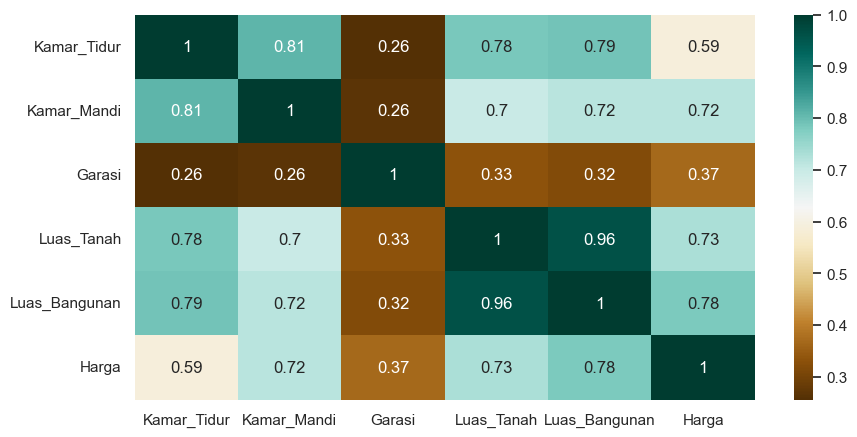

In [160]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

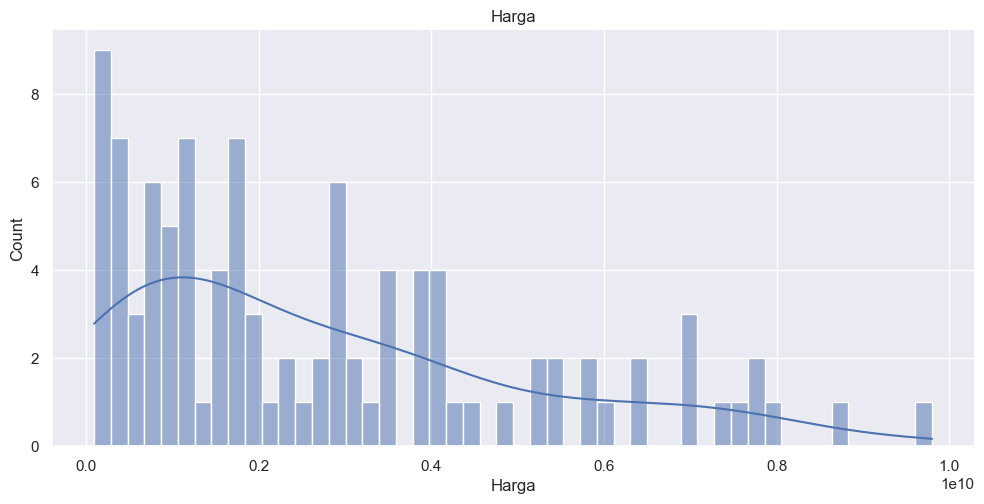

In [161]:
sns.displot(data= df, x=df['Harga'],bins=50, kde=True, height=5, aspect=2)
plt.title('Harga')
plt.show()

array([[<Axes: title={'center': 'Kamar_Tidur'}>,
        <Axes: title={'center': 'Kamar_Mandi'}>],
       [<Axes: title={'center': 'Garasi'}>,
        <Axes: title={'center': 'Luas_Tanah'}>],
       [<Axes: title={'center': 'Luas_Bangunan'}>,
        <Axes: title={'center': 'Harga'}>]], dtype=object)

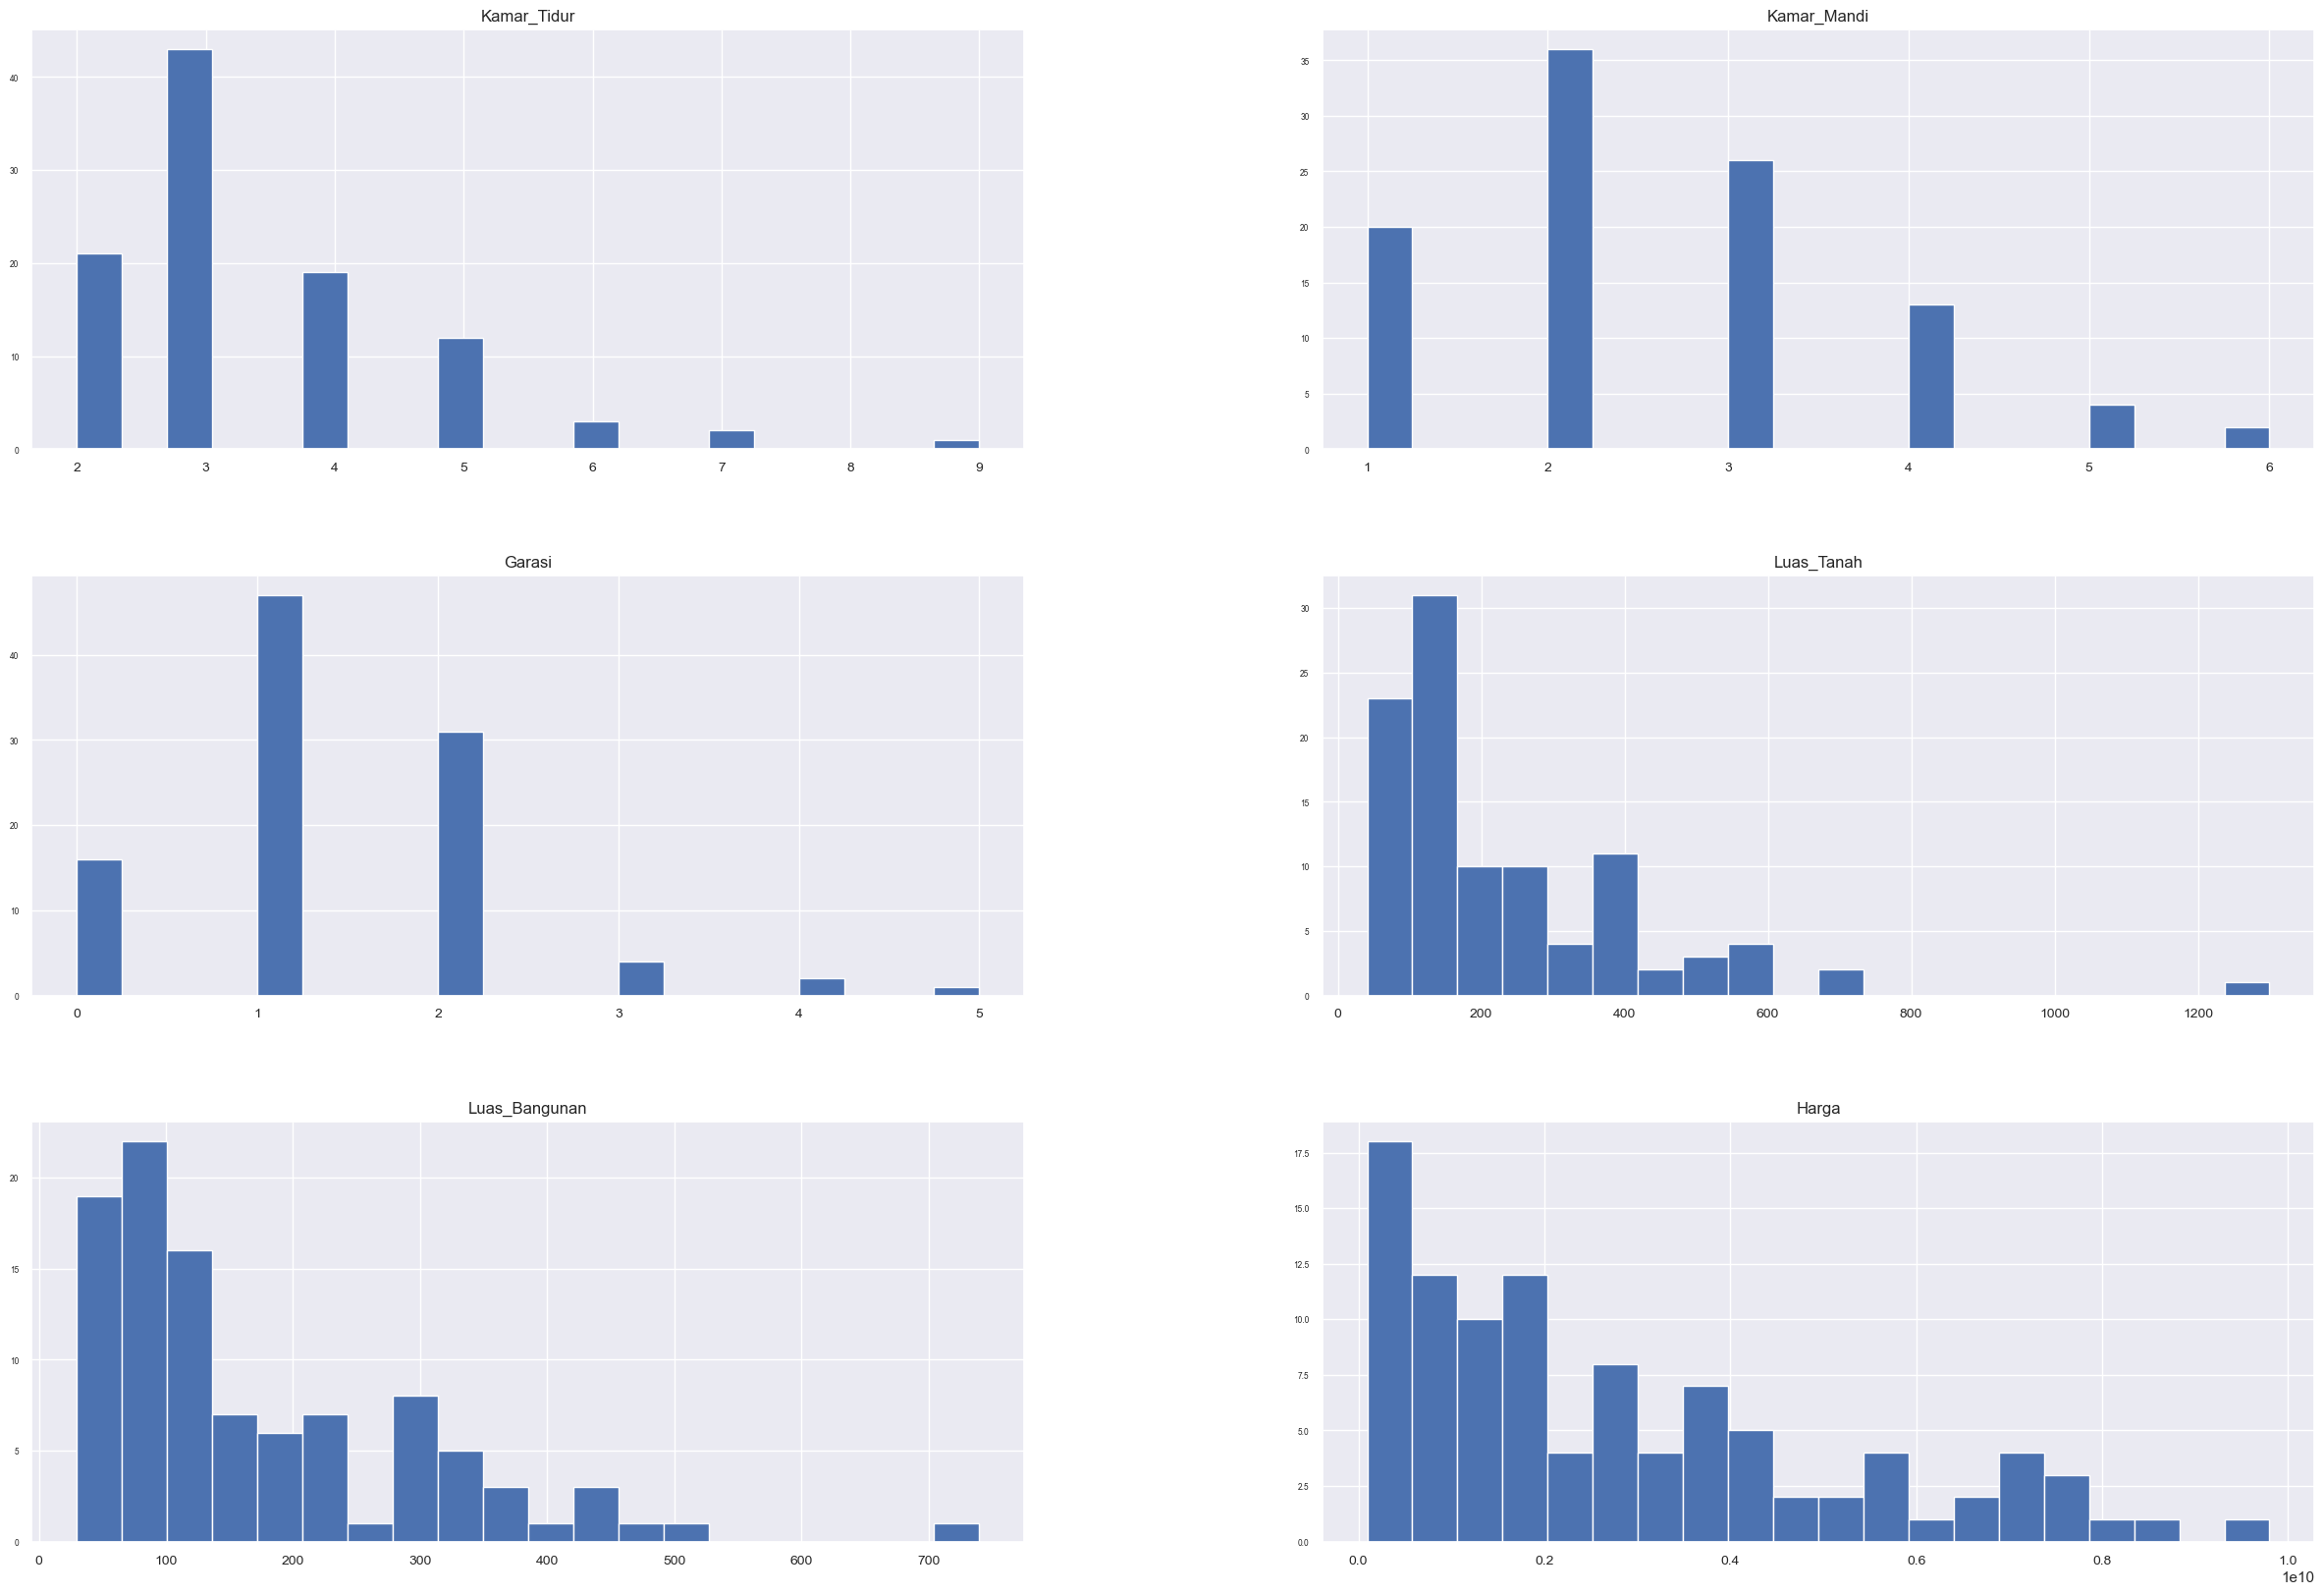

In [162]:
df_hist =df.select_dtypes(include=np.number)
df_hist.hist(figsize=(30, 20), bins=20, xlabelsize=10, ylabelsize=6)

C:\Users\hp\AppData\Local\Temp\ipykernel_11100\858367215.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,1)


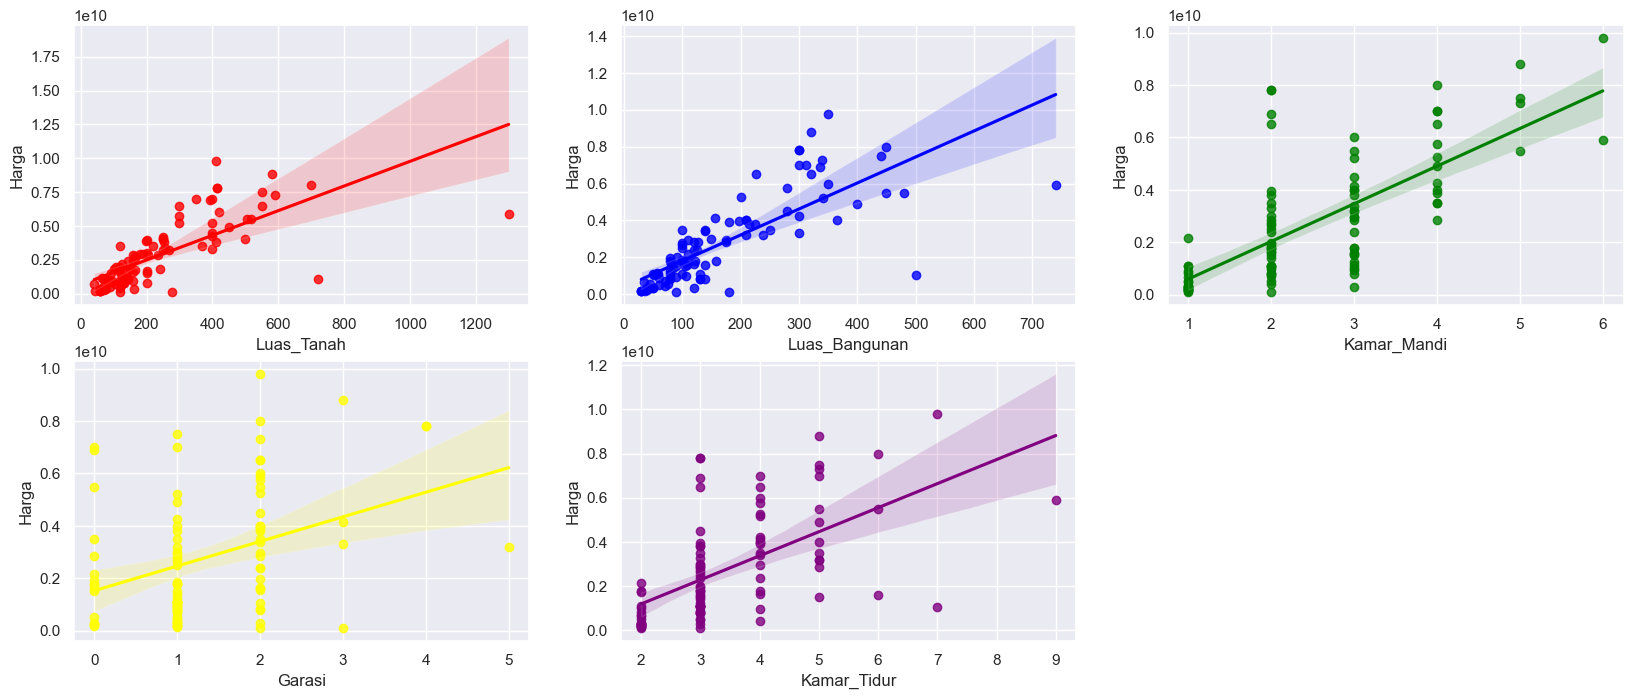

In [163]:
# Scatter from correlaltion
plt.subplots(figsize=(20,8))

plt.subplot(2,3,1)
sns.regplot(data=df, x=df['Luas_Tanah'], y=df['Harga'], color='red')

plt.subplot(2,3,2)
sns.regplot(data=df, x=df['Luas_Bangunan'], y=df['Harga'], color='blue')

plt.subplot(2,3,3)
sns.regplot(data=df, x=df['Kamar_Mandi'], y=df['Harga'], color='green')

plt.subplot(2,3,4)
sns.regplot(data=df, x=df['Garasi'], y=df['Harga'], color='yellow')

plt.subplot(2,3,5)
sns.regplot(data=df, x=df['Kamar_Tidur'], y=df['Harga'], color='purple')
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_11100\789166929.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Harga'], ax = axes[0], norm_hist = True)


Text(0, 0.5, 'SalePrice')

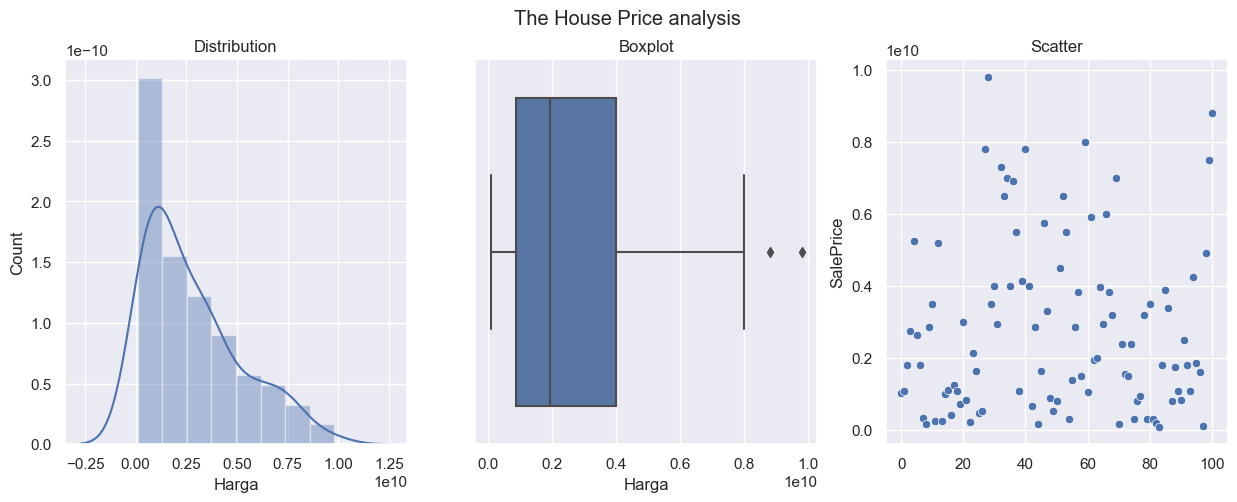

In [164]:
sns.set()
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('The House Price analysis')

sns.distplot(df['Harga'], ax = axes[0], norm_hist = True)
axes[0].set_title('Distribution')
axes[0].set_xlabel('Harga')
axes[0].set_ylabel('Count')


sns.boxplot(x = df['Harga'], ax = axes[1])
axes[1].set_title('Boxplot')
axes[1].set_xlabel('Harga')


sns.scatterplot(y = df['Harga'],x = df.index, ax = axes[2])
axes[2].set_title('Scatter')
axes[2].set_ylabel('SalePrice')

In [165]:
df.shape

(101, 6)

In [166]:
# IQR Method to remove outliers
q1, q3 = np.percentile(df['Harga'], [25, 75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

df = df[(df['Harga'] > lower_bound) & (df['Harga'] < upper_bound)]

In [167]:
df.shape

(99, 6)

((array([-2.45844367, -2.12167496, -1.92689389, -1.7858678 , -1.67340051,
         -1.57882462, -1.49657415, -1.42335969, -1.35706762, -1.29625532,
         -1.23989199, -1.18721415, -1.13763968, -1.09071392, -1.04607459,
         -1.00342799, -0.96253244, -0.92318649, -0.88522027, -0.84848908,
         -0.81286849, -0.77825063, -0.74454126, -0.71165749, -0.67952589,
         -0.64808106, -0.61726442, -0.58702317, -0.55730954, -0.52808006,
         -0.499295  , -0.47091786, -0.44291502, -0.41525531, -0.38790975,
         -0.36085126, -0.33405448, -0.30749548, -0.28115167, -0.25500157,
         -0.22902473, -0.20320154, -0.17751317, -0.15194143, -0.12646868,
         -0.10107773, -0.0757518 , -0.05047437, -0.02522915,  0.        ,
          0.02522915,  0.05047437,  0.0757518 ,  0.10107773,  0.12646868,
          0.15194143,  0.17751317,  0.20320154,  0.22902473,  0.25500157,
          0.28115167,  0.30749548,  0.33405448,  0.36085126,  0.38790975,
          0.41525531,  0.44291502,  0.

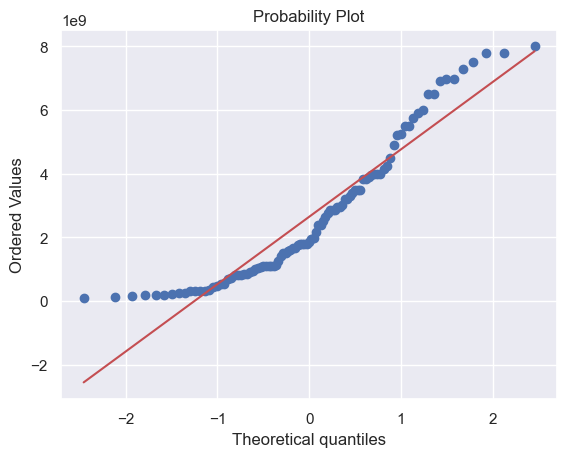

In [168]:
# Probability plot after handling outlier
stats.probplot(df['Harga'], plot=plt)

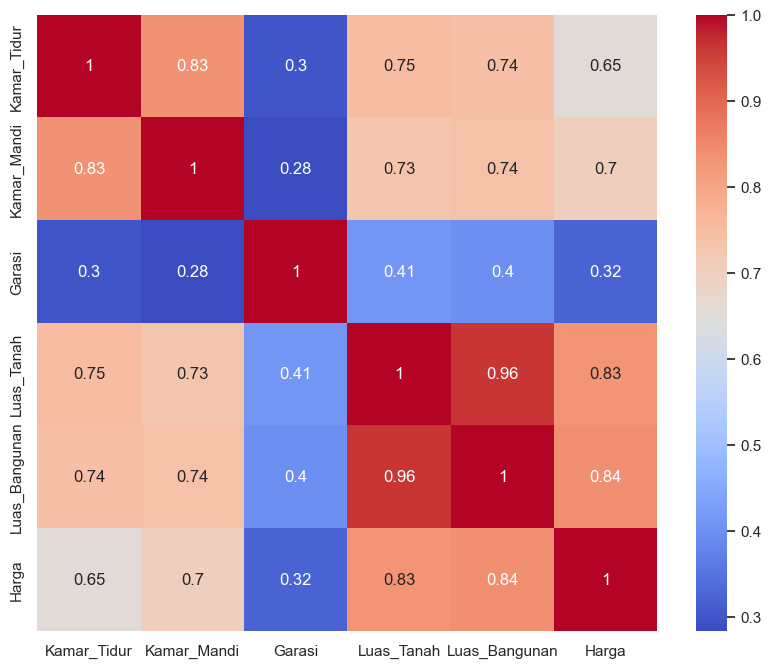

In [169]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='coolwarm')
plt.show()

we only use Luas_Tanah and Luas_bangunan Features

In [187]:
x = df[['Luas_Tanah','Luas_Bangunan']]
y = (df['Harga'])

In [188]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [172]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(79, 2)
(20, 2)
(79,)
(20,)


# Model Definition

## 1. Regresi Linear

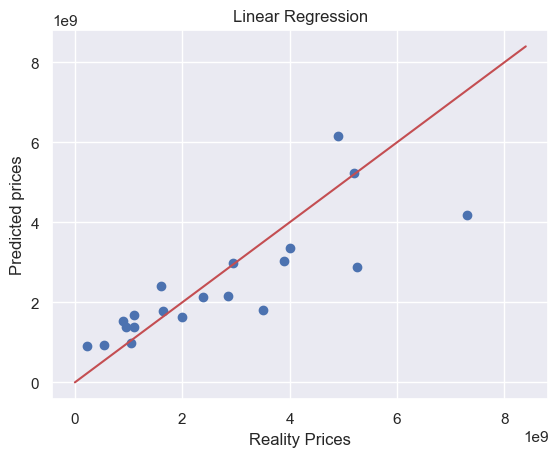

<Figure size 640x480 with 0 Axes>

In [173]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)
lm_pred = lm.predict(x_test)
plt.scatter((y_test),(lm_pred))
plt.plot([1200000000*x for x in range(0, 8)], [1200000000*x for x in range(0, 8)], color = 'r')
plt.xlabel("Reality Prices")
plt.ylabel("Predicted prices")
plt.title('Linear Regression')
plt.show()
plt.clf()

## 2. Decision Tree Regressor

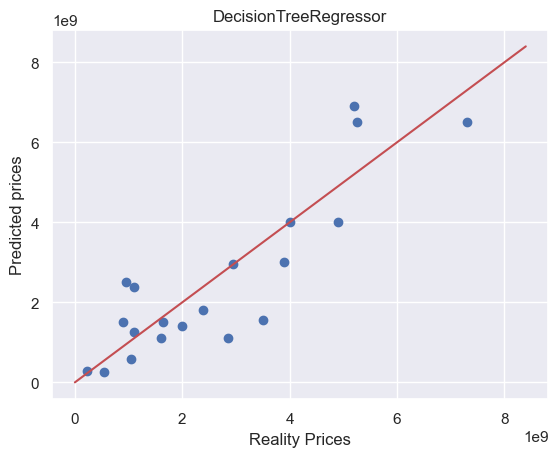

<Figure size 640x480 with 0 Axes>

In [174]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(random_state=42)
DTR.fit(x_train,y_train)
DTR_pred = DTR.predict(x_test)
plt.scatter((y_test), (DTR_pred))
plt.plot([1200000000*x for x in range(0, 8)], [1200000000*x for x in range(0, 8)], color = 'r')
plt.xlabel("Reality Prices")
plt.ylabel("Predicted prices")
plt.title('DecisionTreeRegressor')
plt.show()
plt.clf()

## 3. Random Forest Regressor

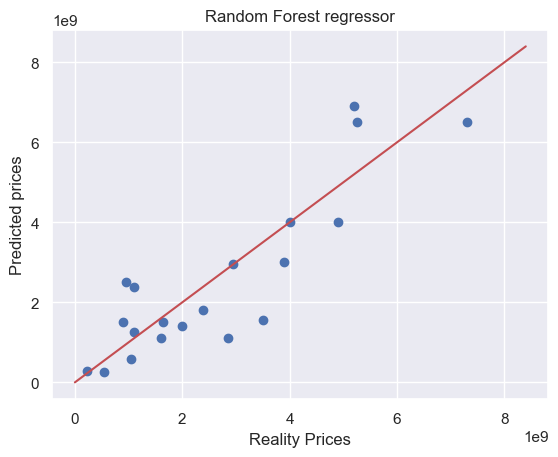

<Figure size 640x480 with 0 Axes>

In [175]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train,y_train)
rf_pred = DTR.predict(x_test)
plt.scatter((y_test),(rf_pred))
plt.plot([1200000000*x for x in range(0, 8)], [1200000000*x for x in range(0, 8)], color = 'r')
plt.xlabel("Reality Prices")
plt.ylabel("Predicted prices")
plt.title('Random Forest regressor')
plt.show()
plt.clf()

## 4. Gradient Boosting

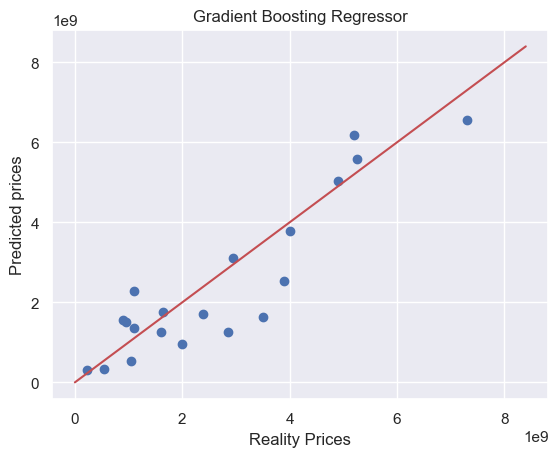

<Figure size 640x480 with 0 Axes>

In [176]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(x_train,y_train)
gb_pred = gb.predict(x_test)
plt.scatter((y_test),(gb_pred))
plt.plot([1200000000*x for x in range(0, 8)], [1200000000*x for x in range(0, 8)], color = 'r')
plt.xlabel("Reality Prices")
plt.ylabel("Predicted prices")
plt.title('Gradient Boosting Regressor')
plt.show()
plt.clf()

## 5. KNeighborsRegressor

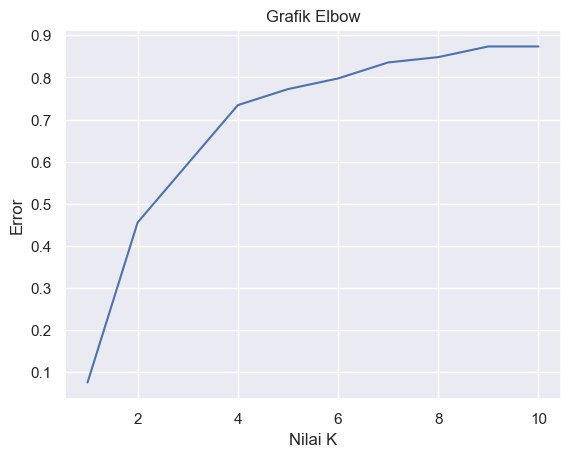

In [177]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
# Inisialisasi variabel
error = []
K = range(1, 11)

# Cari nilai error untuk setiap k
for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    error.append(1 - knn.score(x_train, y_train))

# Plot grafik elbow untuk mencari nilai k terbaik
plt.plot(K, error)
plt.xlabel('Nilai K')
plt.ylabel('Error')
plt.title('Grafik Elbow')
plt.show()

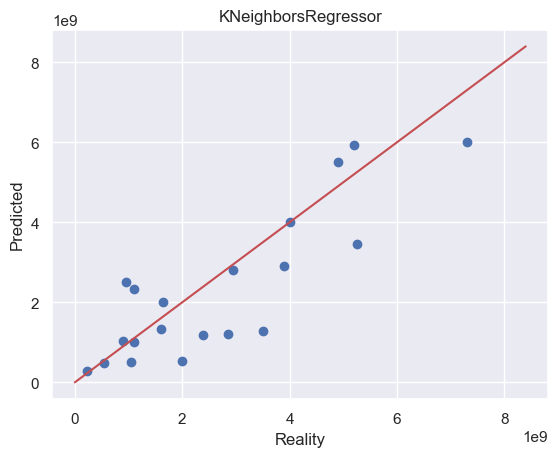

<Figure size 640x480 with 0 Axes>

In [178]:
from sklearn.neighbors import KNeighborsRegressor
sns.set()
KNN = KNeighborsRegressor(n_neighbors = 4, weights = 'distance').fit(x_train, y_train)
KNN_pred = KNN.predict(x_test)
plt.scatter((y_test),(KNN_pred))
plt.plot([1200000000*x for x in range(0, 8)], [1200000000*x for x in range(0, 8)], color = 'r')
plt.xlabel("Reality")
plt.ylabel("Predicted")
plt.title('KNeighborsRegressor')
plt.show()
plt.clf()

# Comparison Actual and Prediction Data

In [179]:
diff= pd.DataFrame({"aktual Value":y_test, "Linear Regrresion":lm_pred, "Decision Tree":DTR_pred, "Random Forest":rf_pred, "Gradient Bossting":gb_pred, "KNeighbors Regressor":KNN_pred})
diff

,aktual Value,Linear Regrresion,Decision Tree,Random Forest,Gradient Bossting,KNeighbors Regressor
63,1990000000,1.629159e+09,1.400000e+09,1.400000e+09,9.509434e+08,5.232561e+08
41,4000000000,3.365086e+09,4.000000e+09,4.000000e+09,3.782018e+09,4.000000e+09
96,1600000000,2.417077e+09,1.100000e+09,1.100000e+09,1.248781e+09,1.338432e+09
18,1100000000,1.678465e+09,2.380000e+09,2.380000e+09,2.273198e+09,2.324702e+09
98,4900000000,6.157119e+09,4.000000e+09,4.000000e+09,5.027625e+09,5.500222e+09
85,3900000000,3.031376e+09,3.000000e+09,3.000000e+09,2.524426e+09,2.911285e+09
65,2950000000,2.977560e+09,2.950000e+09,2.950000e+09,3.097980e+09,2.812858e+09
43,2850000000,2.150679e+09,1.100000e+09,1.100000e+09,1.248781e+09,1.204479e+09
10,3500000000,1.813588e+09,1.570000e+09,1.570000e+09,1.644239e+09,1.283600e+09
0,1040000000,9.824299e+08,5.770000e+08,5.770000e+08,5.253379e+08,5.180877e+08


In [180]:
from sklearn import metrics
mae_lm = metrics.mean_absolute_error(y_test, lm_pred)
mse_lm = metrics.mean_squared_error(y_test, lm_pred)
rmse_lm = np.sqrt(metrics.mean_squared_error(y_test, lm_pred))
r2_lm = r2_score(y_test, lm_pred)
print('Mean Absolute Error LM:', mae_lm)
print('Mean Square Error LM:', mse_lm)
print('Root Mean Square Error LM:', rmse_lm)
print('r2 LM:', r2_lm)

mae_DTR = metrics.mean_absolute_error(y_test, DTR_pred)
mse_DTR = metrics.mean_squared_error(y_test, DTR_pred)
rmse_DTR = np.sqrt(metrics.mean_squared_error(y_test, DTR_pred))
r2_DTR = r2_score(y_test, DTR_pred)
print('Mean Absolute Error DTR:', mae_DTR)
print('Mean Square Error DTR:', mse_DTR)
print('Root Mean Square Error DTR:', rmse_DTR)
print('r2 DTR:', r2_DTR)


mae_rf = metrics.mean_absolute_error(y_test, rf_pred)
mse_rf = metrics.mean_squared_error(y_test, rf_pred)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, rf_pred))
r2_rf = r2_score(y_test, rf_pred)
print('Mean Absolute Error RF:', mae_rf)
print('Mean Square Error RF:', mse_rf)
print('Root Mean Square Error RF:', rmse_rf)
print('r2 RF:', r2_rf)

mae_gb = metrics.mean_absolute_error(y_test, gb_pred)
mse_gb = metrics.mean_squared_error(y_test, gb_pred)
rmse_gb = np.sqrt(metrics.mean_squared_error(y_test, gb_pred))
r2_gb = r2_score(y_test, gb_pred)
print('Mean Absolute Error GB:', mae_gb)
print('Mean Square Error GB:', mse_gb)
print('Root Mean Square Error GB:', rmse_gb)
print('r2 GB:', r2_gb)

mae_KNN = metrics.mean_absolute_error(y_test, KNN_pred)
mse_KNN = metrics.mean_squared_error(y_test, KNN_pred)
rmse_KNN = np.sqrt(metrics.mean_squared_error(y_test, KNN_pred))
r2_KNN = r2_score(y_test, KNN_pred)
print('Mean Absolute Error KNN:', mae_KNN)
print('Mean Square Error KNN:', mse_KNN)
print('Root Mean Square Error KNN:', rmse_KNN)
print('r2 KNN:', r2_KNN)

Mean Absolute Error LM: 768221851.2066549
Mean Square Error LM: 1.193130561901244e+18
Root Mean Square Error LM: 1092305159.6972542
r2 LM: 0.661553939028049
Mean Absolute Error DTR: 772300000.0
Mean Square Error DTR: 9.597754e+17
Root Mean Square Error DTR: 979681274.7011142
r2 DTR: 0.7277479817211612
Mean Absolute Error RF: 772300000.0
Mean Square Error RF: 9.597754e+17
Root Mean Square Error RF: 979681274.7011142
r2 RF: 0.7277479817211612
Mean Absolute Error GB: 651615884.24468
Mean Square Error GB: 6.904195800026113e+17
Root Mean Square Error GB: 830914905.392009
r2 GB: 0.8041540509217686
Mean Absolute Error KNN: 817509859.4793034
Mean Square Error KNN: 1.124018499647752e+18
Root Mean Square Error KNN: 1060197387.1160747
r2 KNN: 0.6811584198638008


In [181]:
data = {'Model': ['Regression Linear', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'KNeighbors Regressor'],
        
        'Mean Absolute Error (MAE)': [mae_lm, mae_DTR, mae_rf, mae_gb, mae_KNN],
        'R-Squared (R2)': [r2_lm, r2_DTR, r2_rf, r2_gb, r2_KNN],
        'Mean Squared Error (MSE)': [mse_lm, mse_DTR, mse_rf, mse_gb, mse_KNN],
        'Root Mean Square Error' : [rmse_lm, rmse_DTR, rmse_rf, rmse_gb, rmse_KNN]
        }

# Buat dataframe dari dictionary
SumTable = pd.DataFrame(data)
SumTable

,Model,Mean Absolute Error (MAE),R-Squared (R2),Mean Squared Error (MSE),Root Mean Square Error
0,Regression Linear,7.682219e+08,0.661554,1.193131e+18,1.092305e+09
1,Decision Tree,7.723000e+08,0.727748,9.597754e+17,9.796813e+08
2,Random Forest,7.723000e+08,0.727748,9.597754e+17,9.796813e+08
3,Gradient Boosting,6.516159e+08,0.804154,6.904196e+17,8.309149e+08
4,KNeighbors Regressor,8.175099e+08,0.681158,1.124018e+18,1.060197e+09


# Model's Comparsion

In [182]:
from numpy.ma.core import shape
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
def model_fit(x_train, x_test, y_train, y_test):
    
  from sklearn.linear_model import LinearRegression
  LM = LinearRegression().fit(x_train, y_train)
    
  from sklearn.tree import DecisionTreeRegressor
  DTR = DecisionTreeRegressor(random_state=42).fit(x_train, y_train)
    
  from sklearn.ensemble import RandomForestRegressor
  RFR = RandomForestRegressor(n_estimators=100, random_state=42).fit(x_train, y_train)

  from sklearn.ensemble import GradientBoostingRegressor 
  GB = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42).fit(x_train, y_train)
    
  KNN = KNeighborsRegressor(n_neighbors = 5, weights = 'distance').fit(x_train, y_train)
  
    
  return LM,RFR, DTR, GB, KNN

In [183]:
Model = model_fit(x_train, x_test, y_train, y_test)

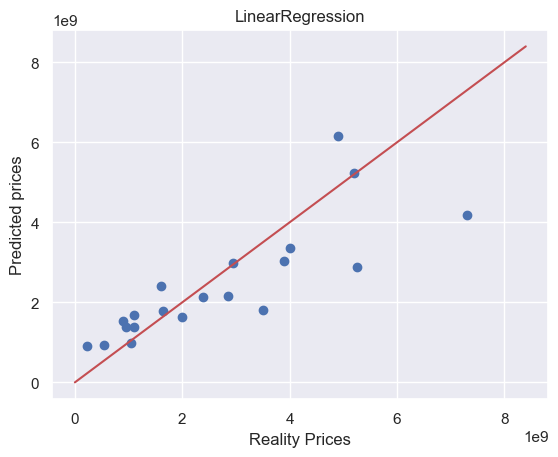

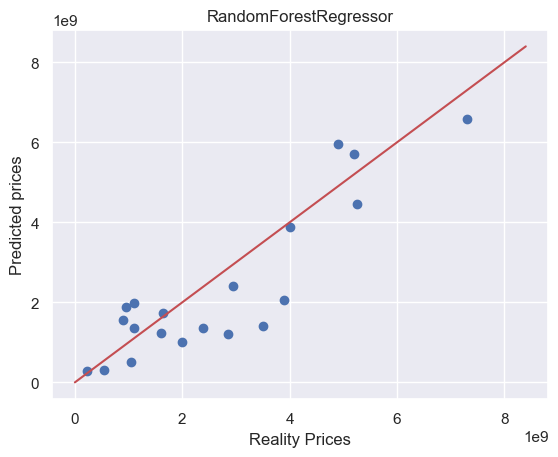

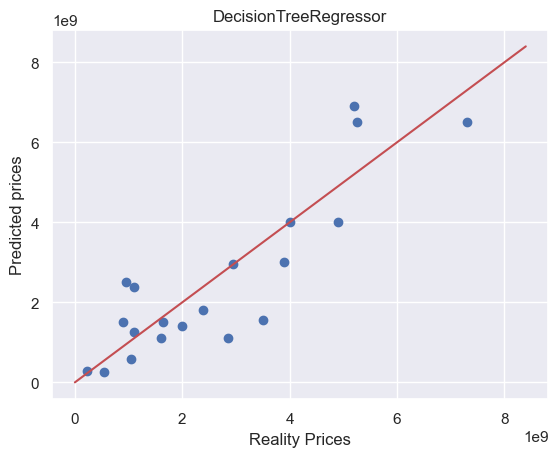

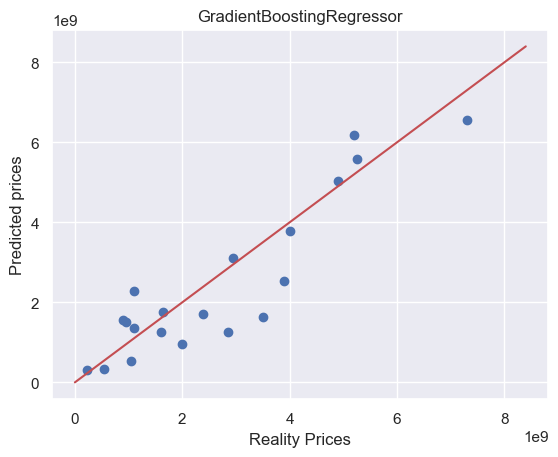

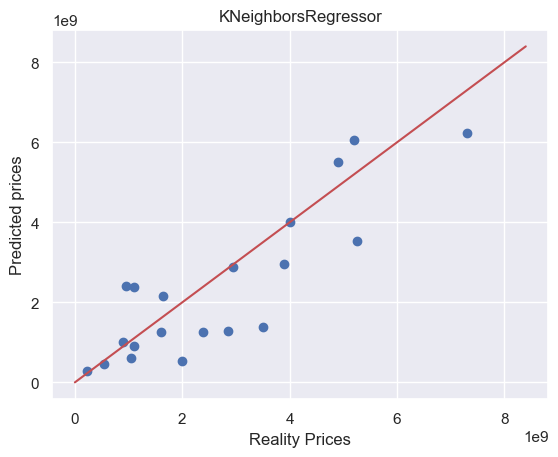

<Figure size 640x480 with 0 Axes>

In [184]:
ML_model = ['LinearRegression','RandomForestRegressor', 'DecisionTreeRegressor', 'GradientBoostingRegressor','KNeighborsRegressor']
for i in range(5):
  plt.scatter((y_test), (Model[i].predict(x_test)))
  plt.plot([1200000000*x for x in range(0, 8)], [1200000000*x for x in range(0, 8)], color = 'r')
  plt.xlabel("Reality Prices")
  plt.ylabel("Predicted prices")
  plt.title(ML_model[i])
  plt.show()
  plt.clf()

<Axes: title={'center': 'The R Square Score Comparsion'}, xlabel='R Square Score', ylabel='Model Type'>

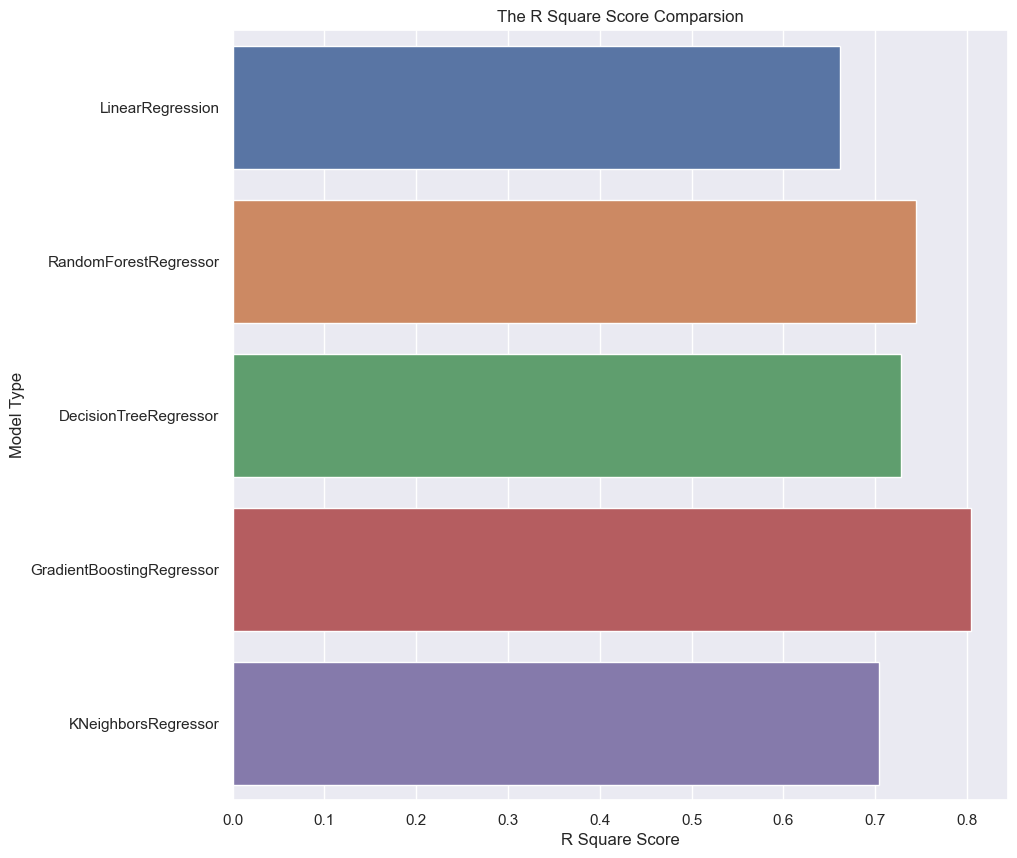

In [185]:
sns.set()
from sklearn.metrics import r2_score
R_square_num = []
for i in range(5):
  R_square = r2_score(y_test, Model[i].predict(x_test))
  R_square_num.append(R_square)
plt.figure(figsize = (10, 10))
plt.xlabel('R Square Score')
plt.ylabel('Model Type')
plt.title('The R Square Score Comparsion')
sns.barplot(x = R_square_num, y = ML_model)

<Axes: title={'center': 'The mean_square_error Comparsion'}, xlabel='mean_square_error', ylabel='Model Type'>

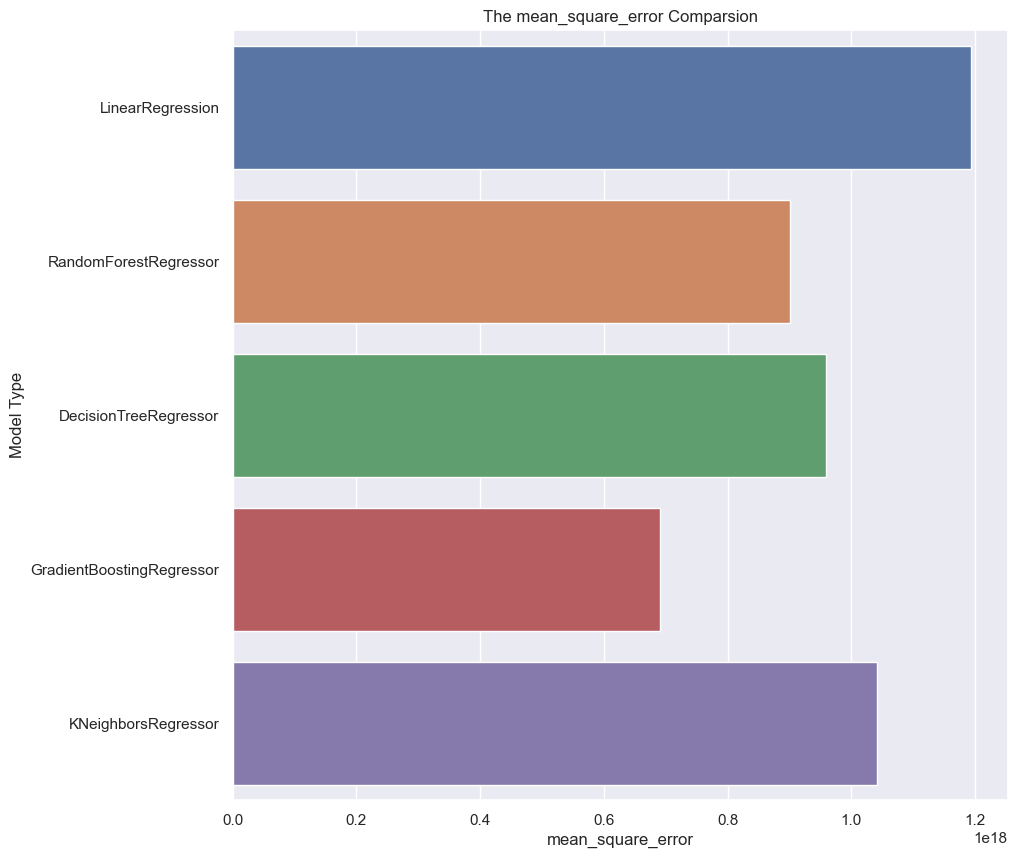

In [186]:
sns.set()
from sklearn.metrics import mean_squared_error
mse_num = []
for i in range(5):
  mse = mean_squared_error(y_test, Model[i].predict(x_test))
  mse_num.append(mse)
plt.figure(figsize = (10, 10))
plt.xlabel('mean_square_error')
plt.ylabel('Model Type')
plt.title('The mean_square_error Comparsion')
sns.barplot(x = mse_num, y = ML_model)

## GradientBoostRegressor model is the best model to predict house price in Bandung City